# Задача: Спасти фабрику (Feature Engineering Challenge)

## Описание задачи
В волшебном городе Виджетвилль (Widgetville) корпорация Widget Corp производит уникальные виджеты с рубиновым и сапфировым магическими камнями внутри. Недавно в процессы производства проник злой дух, который портит рабочие потоки и вносит ошибки в маркировку виджетов.

Ваша задача как главного инженера-детектива:

1. **Классифицировать виджеты**: разобрать, выглядит ли каждый виджет как рубиновый (Ruby) или сапфировый (Sapphire).  
2. Использовать имеющиеся размеченные данные (за прошлый месяц) для обучения модели.  
3. Данные описывают "Пульс машины" — для каждого виджета есть массив размера (187×8).  
4. **Важный инструмент**: Decision Tree Classifier (дерево решений) из библиотеки scikit-learn.  
   - Два режима: **Efficient** (max_depth=20) и **Super Duper Efficient** (max_depth=4).  
5. Оценка качества: ROC AUC (roc_auc_score).
6. Ограничения по времени: 5 минут на всю обработку (генерация признаков + обучение + предсказания) на стандартном Colab (без GPU).

Дополнительные советы:
- Стремитесь к минимальному, но информативному набору признаков.
- Данные могли быть частично искажены — подумайте, как можно восстановить истинное распределение.
- Тщательная документация кода и шагов.

## Структура решения
1. **Загрузка и визуализация данных**  
2. **Базовые наборы признаков**  
3. **Разработка продвинутых признаков**  
4. **Оценка моделей**  
5. **Финальные функции для тестовых предсказаний**  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Установим фиксированное семя для воспроизводимости
np.random.seed(2024)

# Загрузим данные
!gdown 1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA  # train+val
!gdown 1LmNuET1iDOIS23MTzG-7B99Pfrpwaxhd  # test

data = pd.read_pickle('FE_hometask_data_v3.pickle')
X_train = np.array([x[0] for x in data['train'].values()])
y_train = np.array([x[1] for x in data['train'].values()])
X_val = np.array([x[0] for x in data['val'].values()])
y_val = np.array([x[1] for x in data['val'].values()])

test_data = pd.read_pickle('FE_hometask_data_v3_test.pickle')
X_test = np.array([x[0] for x in test_data['test'].values()])

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape)

Downloading...
From (original): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA
From (redirected): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA&confirm=t&uuid=97909e01-33e3-4b91-9867-1a68fa2a29a5
To: /kaggle/working/FE_hometask_data_v3.pickle
100%|█████████████████████████████████████████| 260M/260M [00:02<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LmNuET1iDOIS23MTzG-7B99Pfrpwaxhd
To: /kaggle/working/FE_hometask_data_v3_test.pickle
100%|██████████████████████████████████████| 24.3M/24.3M [00:00<00:00, 39.5MB/s]
(20240, 187, 8) (20240,) (1456, 187, 8) (1456,) (2024, 187, 8)


Визуализация "Пульса машины"

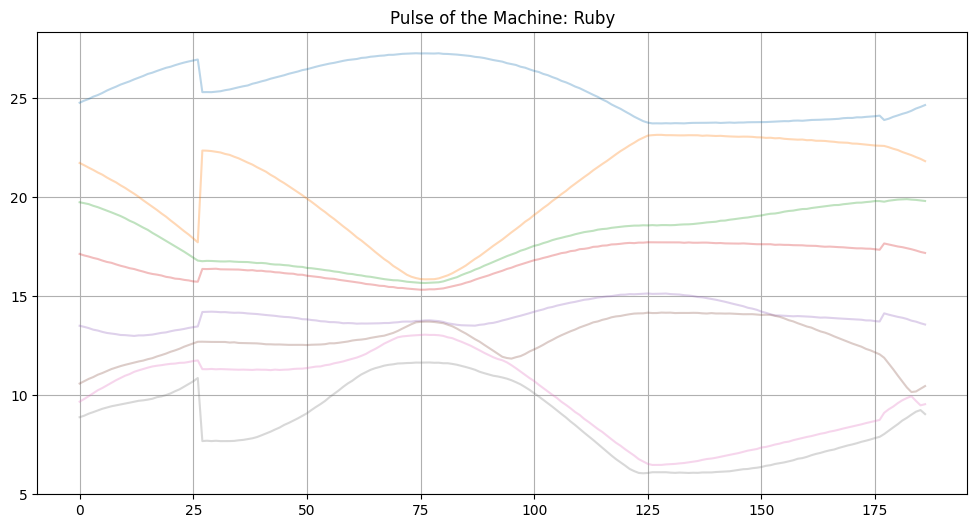

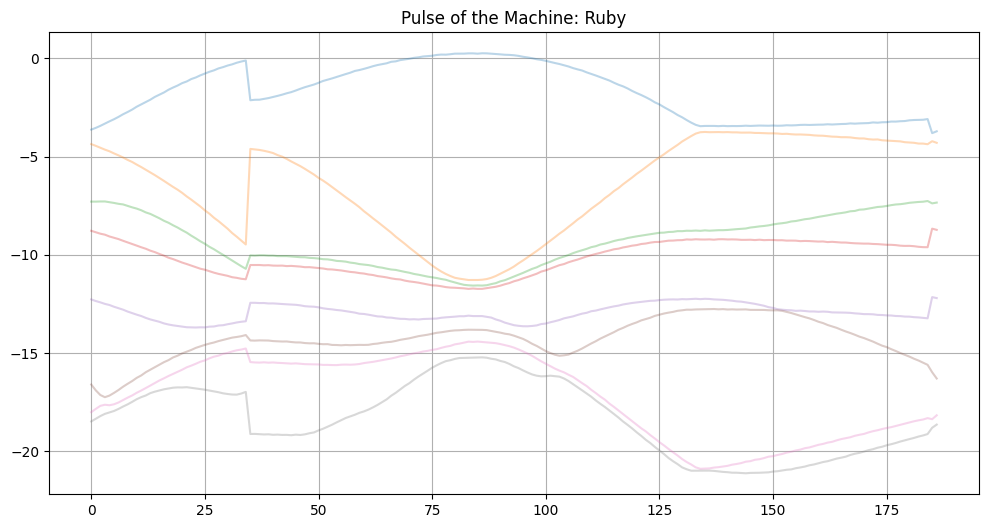

In [2]:
# Функция для визуализации 8 потоков значений

def plot_pulse(arr, label):
    plt.figure(figsize=(12, 6))
    for i in range(arr.shape[1]):
        plt.plot(arr[:, i], alpha=0.3)
    plt.title(f"Pulse of the Machine: {label}")
    plt.grid()
    plt.show()

# Примеры
plot_pulse(X_train[0], 'Ruby' if y_train[0] else 'Sapphire')
plot_pulse(X_train[1], 'Ruby' if y_train[1] else 'Sapphire')

Функции для оценки моделей (не менять!)

In [3]:
def efficient_eval(train_features, val_features):
    model = DecisionTreeClassifier(max_depth=20, random_state=2024)
    model.fit(train_features, y_train)
    preds = model.predict(val_features)
    return roc_auc_score(y_val, preds)


def super_duper_efficient_eval(train_features, val_features):
    model = DecisionTreeClassifier(max_depth=4, random_state=2024)
    model.fit(train_features, y_train)
    preds = model.predict(val_features)
    return roc_auc_score(y_val, preds)

# 1. Базовые признаки

Каждое 10-е значение исходного массива:

In [4]:
def feature_set_nth(X, n=10):
    # Разбиваем 3D -> 2D и берём каждый n-й столбец
    return X.reshape(X.shape[0], -1)[:, ::n]

# 2. Среднее / стандартное отклонение по 8 потокам:

In [5]:
def feature_set_mean(X):
    return X.mean(axis=2)

def feature_set_std(X):
    return X.std(axis=2)

Результаты базовых моделей

In [6]:
# Эффективный режим
print('Efficient (10th):', efficient_eval(feature_set_nth(X_train), feature_set_nth(X_val)))
print('Efficient (std):', efficient_eval(feature_set_std(X_train), feature_set_std(X_val)))
# Супер-эффективный режим
print('SuperDuper (10th):', super_duper_efficient_eval(feature_set_nth(X_train), feature_set_nth(X_val)))
print('SuperDuper (std):', super_duper_efficient_eval(feature_set_std(X_train), feature_set_std(X_val)))

Efficient (10th): 0.5001700018954235
Efficient (std): 0.6392012646577783
SuperDuper (10th): 0.5033726812816189
SuperDuper (std): 0.6041085745438772


# 2. Продвинутые признаки и исправление искажений

## 2.1 Нормализация: вычитание медианы и масштабирование

In [7]:
def normalize_median_scale(X):
    X = X.copy().astype(float)
    for i in range(X.shape[0]):
        # вычитаем медиану по всем элементам
        med = np.median(X[i])
        X[i] -= med
        # масштабируем так, чтобы макс абсолютное значение = 10
        mx = np.max(np.abs(X[i]))
        X[i] = X[i] * (10 / mx)
    return X

## 2.2 Функция untime(): восстановление циклов
Иногда смещение в "времени" данных мешает распознаванию. Мы ищем резкий перепад и циклически сдвигаем данные.

In [8]:
def untime(X):
    X = X.copy()
    for i in range(X.shape[0]):
        arr = X[i]
        # считаем квадрат разницы между соседними шагами
        diffs = np.sum((arr - np.roll(arr, 1, axis=0))**2, axis=1)
        # находим позицию максимального скачка
        idx = np.argmax(diffs)
        # сдвигаем так, чтобы скачок оказался в начале
        X[i] = np.roll(arr, -idx, axis=0)
    return X

## 3. Итоговые наборы признаков

Efficient: все признаки после нормализации и сортировки

In [9]:
def feature_set_efficient(X):
    Xn = normalize_median_scale(X)
    return Xn.reshape(Xn.shape[0], -1)

Super Duper Efficient: каждая 3-я ценность после normalize+untime

In [10]:
def feature_set_super_duper(X):
    Xn = normalize_median_scale(X)
    Xu = untime(Xn)
    return Xu.reshape(Xu.shape[0], -1)[:, ::3]

## 4. Оценка финальных моделей

In [11]:
print('Efficient AUC:', efficient_eval(
    feature_set_efficient(X_train), feature_set_efficient(X_val)
))
print('SuperDuper AUC:', super_duper_efficient_eval(
    feature_set_super_duper(X_train), feature_set_super_duper(X_val)
))

Efficient AUC: 0.9125887380583437
SuperDuper AUC: 0.9419345824890232


## 5. Генерация предсказаний на тесте

In [12]:
def efficient_test_predictions(train_features, test_features, out_file='efficient_test_predictions.txt'):
    model = DecisionTreeClassifier(max_depth=20, random_state=2024)
    model.fit(train_features, y_train)
    preds = model.predict(test_features)
    with open(out_file, 'w') as f:
        f.write(''.join(['1' if p else '0' for p in preds]))


def super_duper_test_predictions(train_features, test_features, out_file='super_duper.txt'):
    model = DecisionTreeClassifier(max_depth=4, random_state=2024)
    model.fit(train_features, y_train)
    preds = model.predict(test_features)
    with open(out_file, 'w') as f:
        f.write(''.join(['1' if p else '0' for p in preds]))

# Запуск для теста
efs = feature_set_efficient(X_train)
ts = feature_set_efficient(X_test)
efficient_test_predictions(efs, ts)
sdfs = feature_set_super_duper(X_train)
tsd = feature_set_super_duper(X_test)
super_duper_test_predictions(sdfs, tsd)